<a href="https://colab.research.google.com/github/faithNassiwa/predictive-diagnosis-assistant/blob/main/notebooks/NYPH_DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [115]:
# Mount google drive to access folder with data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
# Load datasets
training_path = '/content/drive/MyDrive/DS5500/Data/kaggle_KAUSHIL268/Training.csv'
test_path = '/content/drive/MyDrive/DS5500/Data/kaggle_KAUSHIL268/Testing.csv'

training_df = pd.read_csv(training_path, usecols = lambda col: col not in ["Unnamed: 133"])
test_df = pd.read_csv(test_path)

In [124]:
# Peek at dataset
training_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [125]:
# split data into training and test sets
X_train = training_df.iloc[:, :-1]
y_train = training_df.iloc[:, -1]
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:,-1]

In [127]:
# Similar columns
print(X_train['fluid_overload'].unique())
print(X_test['fluid_overload'].unique())


print(X_train['fluid_overload.1'].unique())
print(X_test['fluid_overload.1'].unique())

[0]
[0]
[0 1]
[0 1]


In [128]:
# Drop column with one value and similar to 'fluid_overload.1'
X_train.drop(columns=['fluid_overload'], axis=1, inplace=True)
X_test.drop(columns=['fluid_overload'], axis=1, inplace=True)


In [129]:
disease_labels = ['(vertigo) Paroymsal  Positional Vertigo' 'AIDS' 'Acne'
 'Alcoholic hepatitis' 'Allergy' 'Arthritis' 'Bronchial Asthma'
 'Cervical spondylosis' 'Chicken pox' 'Chronic cholestasis' 'Common Cold'
 'Dengue' 'Diabetes ' 'Dimorphic hemmorhoids(piles)' 'Drug Reaction'
 'Fungal infection' 'GERD' 'Gastroenteritis' 'Heart attack' 'Hepatitis B'
 'Hepatitis C' 'Hepatitis D' 'Hepatitis E' 'Hypertension '
 'Hyperthyroidism' 'Hypoglycemia' 'Hypothyroidism' 'Impetigo' 'Jaundice'
 'Malaria' 'Migraine' 'Osteoarthristis' 'Paralysis (brain hemorrhage)'
 'Peptic ulcer diseae' 'Pneumonia' 'Psoriasis' 'Tuberculosis' 'Typhoid'
 'Urinary tract infection' 'Varicose veins' 'hepatitis A']

In [130]:
print(X_train.columns.tolist())
print(X_test.columns.tolist())

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bowel_movements', 'pa

In [131]:
# Decision Tree Model

# Initialize and fit the model
clf = DecisionTreeClassifier(random_state=423)
clf.fit(X_train, y_train)

# make predictions
y_pred = clf.predict(X_test)

In [132]:
# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy score is {accuracy * 100:.2f}%')
print("Classification Report")
print(classification_report(y_test, y_pred))

The accuracy score is 97.62%
Classification Report
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1

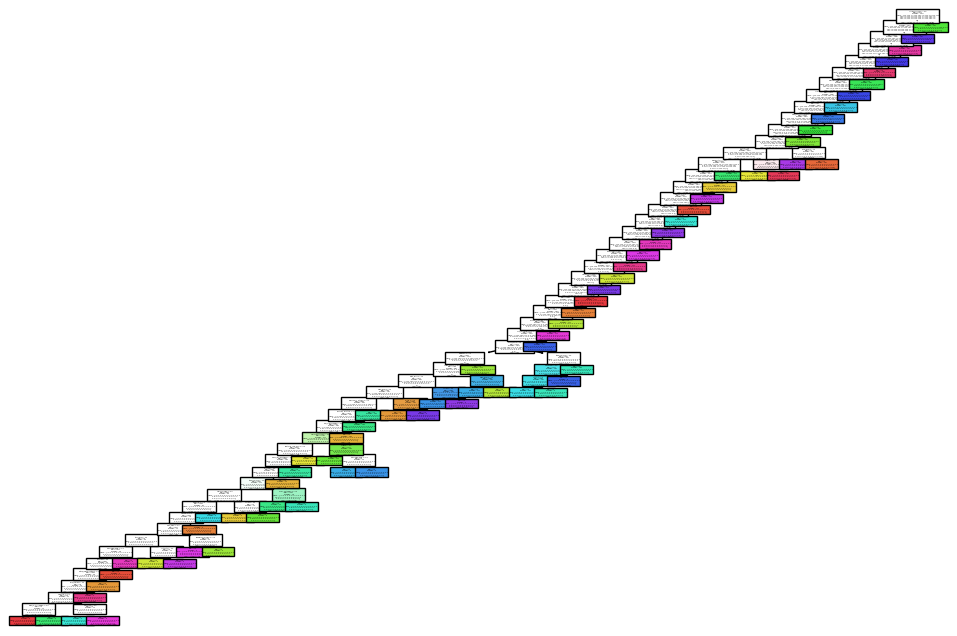

In [133]:
feature_names = X_train.columns.tolist()
class_names = np.unique(y_train).astype(str).tolist()

# Visualize the tree
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names= feature_names, class_names=class_names)
plt.show()

In [134]:
# Using Best Parameters from Cross Validation

# most important features from Cross Validation with threshold of 0.01 and above
most_important_features = ['itching', 'skin_rash', 'stomach_pain', 'vomiting', 'burning_micturition',
 'fatigue', 'high_fever', 'yellowish_skin', 'nausea', 'mild_fever', 'malaise',
 'chest_pain', 'pain_in_anal_region', 'neck_pain', 'excessive_hunger',
 'stiff_neck', 'loss_of_balance', 'internal_itching', 'irritability',
 'muscle_pain']

# Selecting the most important features from the training and test sets
X_train_cv = X_train[most_important_features].copy()
X_test_cv = X_test[most_important_features].copy()

clf_cv = DecisionTreeClassifier(min_samples_split= 2, min_samples_leaf= 1,
                                max_features= 0.5, max_depth=25,
                                criterion='entropy', random_state=20)
clf_cv.fit(X_train_cv, y_train)

y_pred_cv = clf_cv.predict(X_test_cv)

accuracy_cv = accuracy_score(y_test, y_pred_cv)
print(f'The accuracy score is {accuracy_cv * 100:.2f}%')
print("Classification Report")
print(classification_report(y_test, y_pred_cv, zero_division=1))



The accuracy score is 95.24%
Classification Report
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       0.50      1.00      0.67         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1

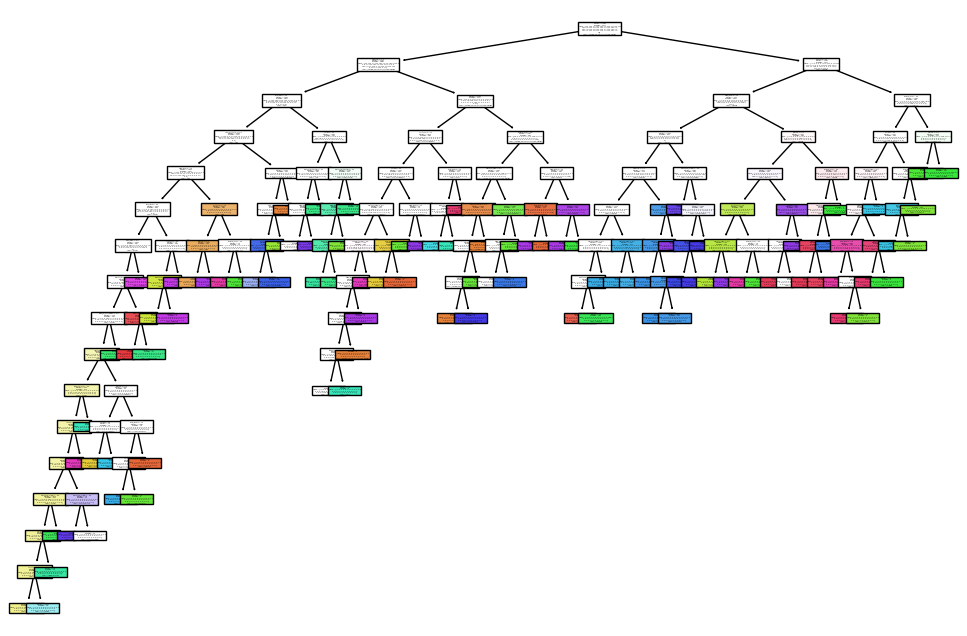

In [135]:
# Plot Tree
feature_names = X_train_cv.columns.tolist()
class_names = np.unique(y_train).astype(str).tolist()

# Visualize the tree
plt.figure(figsize=(12,8))
plot_tree(clf_cv, filled=True, feature_names= feature_names, class_names=class_names)
plt.show()

In [136]:
# Using entire dataset but with cross validation

clf_cv = DecisionTreeClassifier(min_samples_split= 2, min_samples_leaf= 1,
                                max_features= 0.5, max_depth=25,
                                criterion='entropy', random_state=21)
clf_cv.fit(X_train, y_train)

y_pred_cv = clf_cv.predict(X_test)

accuracy_cv = accuracy_score(y_test, y_pred_cv)
print(f'The accuracy score is {accuracy_cv * 100:.2f}%')
print("Classification Report")
print(classification_report(y_test, y_pred_cv, zero_division=1))

The accuracy score is 100.00%
Classification Report
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      